# PREDECIR LAS ENFERMEDADES DEL CORAZON

In [62]:
import pandas as pd
import matplotlib.pyplot as plt



In [63]:
data= pd.read_csv('phpgNaXZe.csv')
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,Class
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [64]:
# Cambiamos el nombre de las columnas 

In [65]:
columnas= ['pasis','tabaco','pbcoles','adiposidad','familia','tipo','obesidad','alcohol','edad','enfcard']
data.columns= columnas
data.head()

,pasis,tabaco,pbcoles,adiposidad,familia,tipo,obesidad,alcohol,edad,enfcard
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [66]:
# Verificamos el formato que contiene nuestros datos

In [50]:
data.dtypes

pasis           int64
tabaco        float64
pbcoles       float64
adiposidad    float64
familia         int64
tipo            int64
obesidad      float64
alcohol       float64
edad            int64
enfcard         int64
dtype: object

In [67]:
# Tambien verificamos si no hay dados perdidos con la funcion isnull y se suma los resultados 

In [68]:
data.isnull().sum()

pasis         0
tabaco        0
pbcoles       0
adiposidad    0
familia       0
tipo          0
obesidad      0
alcohol       0
edad          0
enfcard       0
dtype: int64

In [69]:
data.head()

,pasis,tabaco,pbcoles,adiposidad,familia,tipo,obesidad,alcohol,edad,enfcard
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,2
1,144,0.01,4.41,28.61,2,55,28.87,2.06,63,2
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,1
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,2
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,2


In [70]:
# En la columna de famila y enfcard los datos son de 1 y 2 y lo cambiaremos por 0 y 1
# tambien modificaremos la columna pasis, porque son valores mas grandes que las otras columnas y ajustamos para obtener un mejor resultado
# utilizamos la libreria sklearn para el preprocesamiento de los datos

In [72]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
data['enfcard']= encoder.fit_transform(data['enfcard'])
data['familia']= encoder.fit_transform(data['familia'])
data.head()


,pasis,tabaco,pbcoles,adiposidad,familia,tipo,obesidad,alcohol,edad,enfcard
0,160,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,0,60,25.99,57.34,49,1


In [73]:
from sklearn.preprocessing import MinMaxScaler
scale= MinMaxScaler(feature_range= (0,100))
data['pasis']= scale.fit_transform(data['pasis'].values.reshape(-1,1))
data.head()

,pasis,tabaco,pbcoles,adiposidad,familia,tipo,obesidad,alcohol,edad,enfcard
0,50.427350,12.00,5.73,23.11,0,49,25.30,97.20,52,1
1,36.752137,0.01,4.41,28.61,1,55,28.87,2.06,63,1
2,14.529915,0.08,3.48,32.28,0,52,29.14,3.81,46,0
3,58.974359,7.50,6.41,38.03,0,51,31.99,24.26,58,1
4,28.205128,13.60,3.50,27.78,0,60,25.99,57.34,49,1


In [74]:
# Ahora vamos a vizualizar los datos de acuerdo a la edad

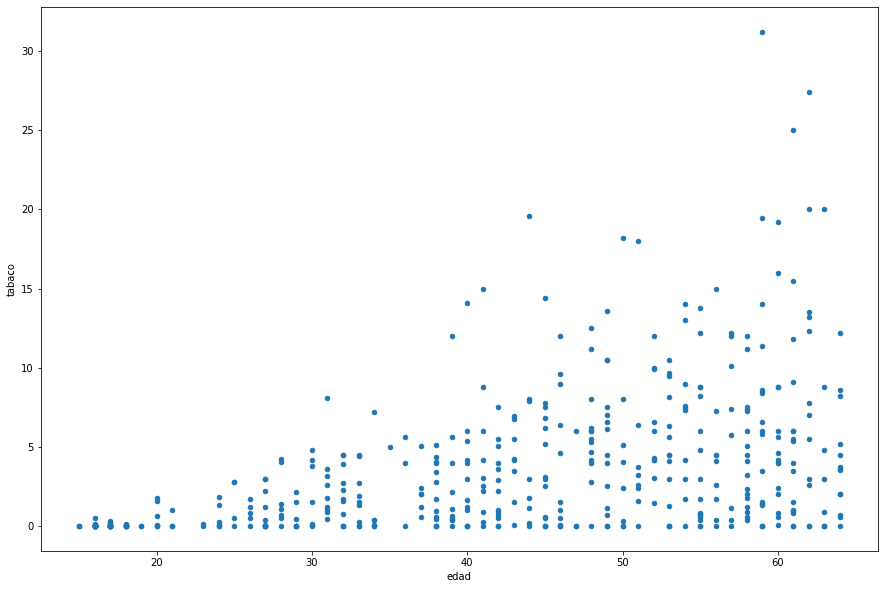

In [79]:
data.plot(x='edad',y='tabaco',kind='scatter',figsize=(15,10))

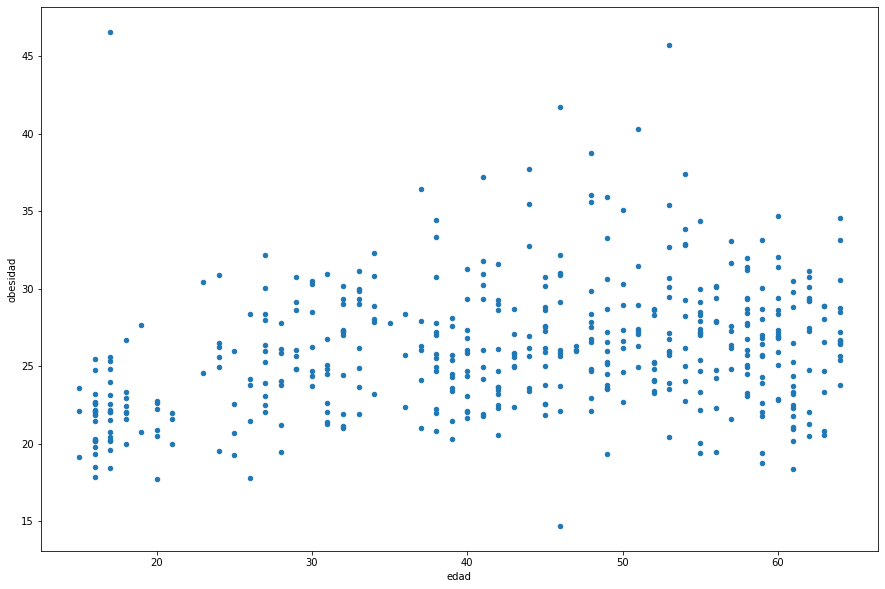

In [80]:
data.plot(x='edad',y='obesidad',kind='scatter',figsize=(15,10))

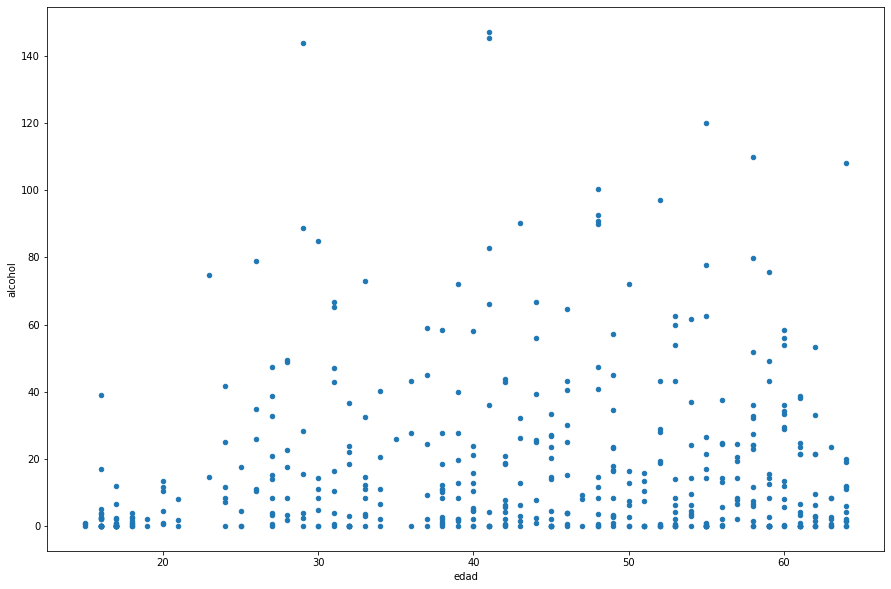

In [81]:
data.plot(x='edad',y='alcohol',kind='scatter',figsize=(15,10))

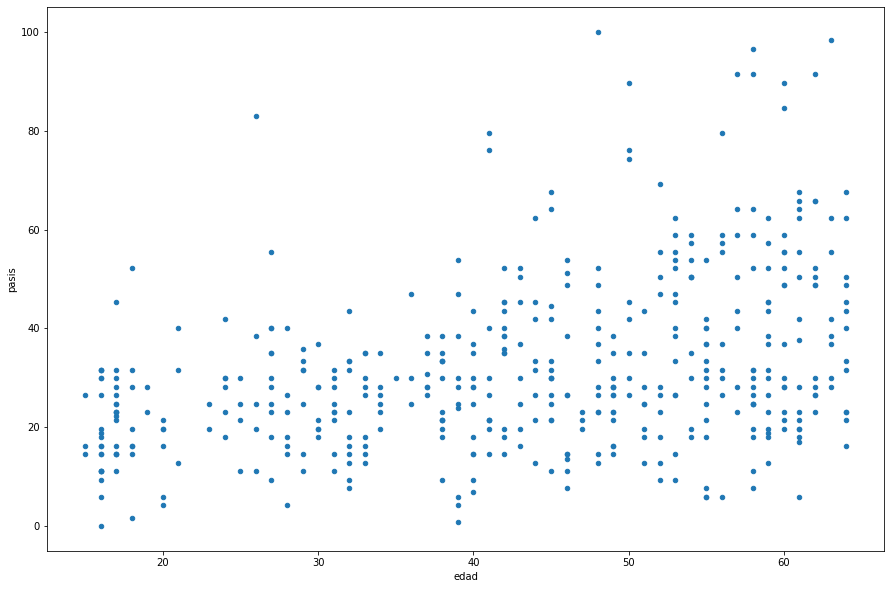

In [82]:
data.plot(x='edad',y='pasis',kind='scatter',figsize=(15,10))

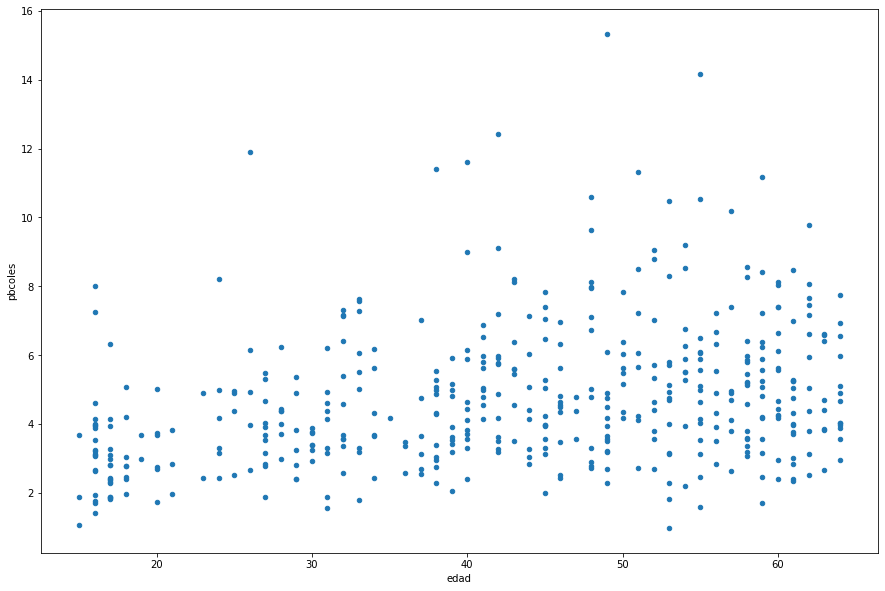

In [99]:
data.plot(x='edad',y='pbcoles',kind='scatter',figsize=(15,10))

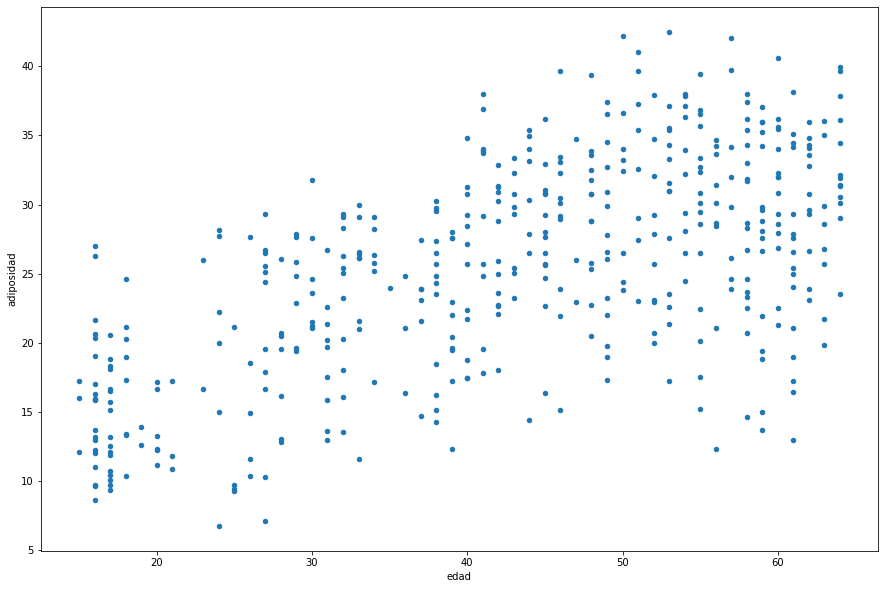

In [100]:
data.plot(x='edad', y='adiposidad', kind='scatter', figsize=(15,10))

In [86]:
# Ahora construire el modelo de Machine Learning, utilizamos la clasificacion para predecir si existe o no una efermedad de corazon
# importamos las librerias que vamos a utilizar

In [87]:
from sklearn.model_selection import train_test_split #separar los datos de entrenamiento y prueba
from sklearn import svm # maquinas de vectores de soportes, este es el algoritmo que vamos a utilizar
from sklearn.metrics import confusion_matrix # la matriz de confusion
from sklearn.metrics import accuracy_score, precision_score # exatitud y precision del modelo



In [88]:
# se define las variables independientes y dependientes
x= data.drop('enfcard', axis=1)
y= data['enfcard']

In [89]:
# se separa los datos de entrenamiento y prueba
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20, random_state=1)


In [91]:
algoritmo= svm.SVC(kernel='linear')
# entrenamos el algoritmo
algoritmo.fit(x_train, y_train)
# hacemos la predicion
y_test_pred= algoritmo.predict(x_test)

In [92]:
# ahora vamos a calcular la matriz de confusion
print(confusion_matrix(y_test,y_test_pred))

[[57  9]
 [17 10]]


In [93]:
# como podemos ver el modelo no acerto muy bien una gran parte de los datos


In [97]:
# ahora procedemos a calcular la exatitud y precision de este modelo
accuracy_score(y_test, y_test_pred)

0.7204301075268817

In [98]:
precision_score(y_test, y_test_pred)

0.5263157894736842